In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
jeans = pd.read_csv('../datasets/jeans_measurements.csv')
jeans.head()

/var/folders/1n/jx1cq0bx301bmmtgw78690fm0000gn/T/ipykernel_22088/298395217.py:1: DtypeWarning: Columns (61) have mixed types. Specify dtype option on import or set low_memory=False.
  jeans = pd.read_csv('../datasets/jeans_measurements.csv')


,id,ean_no,gender,collection,cat,style_no,pocket_bag_print,waist_band_print,pocket_arquette,closure,...,washcarePrint_date,washcare_username,barcode_print,barcode_username,barcode_print_date,remarks,barcode_no,description,created_at,updated_at
0,1,9111001018005,M,TP,BO,UNTPMBO1018005,No,No,Yes,Zipper,...,2023-09-16 04:51:18,washcare_print,YES,pooja@un,2023-08-28 06:34:26,NaN,NaN,Men's black jeans that sit comfortably at the ...,2023-04-19 07:28:17,2023-04-19 09:09:29
1,2,9111001020019,M,TP,BO,UNTPMBO1020019,No,No,Yes,Zipper,...,2023-07-05 09:43:04,washcare_print,YES,pooja@un,2023-08-24 11:08:49,NaN,NaN,Men's light indigo jeans that sit low on waist...,2023-04-19 07:32:37,2023-04-19 09:27:36
2,3,9111001018077,M,TP,BO,UNTPMBO1018077,No,No,No,Zipper,...,2023-05-03 08:05:37,NaN,NaN,NaN,NaN,NaN,NaN,Men's mid indigo jeans that sit comfortably at...,2023-04-19 07:36:50,2023-04-19 09:30:24
3,4,9111001019055,M,TP,BO,UNTPMBO1019055,Yes,No,Yes,Zipper,...,2023-05-03 08:54:38,NaN,YES,pooja@un,2023-08-24 10:15:50,NaN,NaN,Men's mid indigo jeans that sit comfortably at...,2023-04-19 07:39:37,2023-04-19 09:32:20
4,5,9111001019003,M,TP,BO,UNTPMBO1019003,Yes,Yes,No,Zipper,...,2023-05-03 07:14:05,NaN,NaN,NaN,NaN,NaN,NaN,Men's dark indigo jeans that sit comfortably a...,2023-04-19 07:42:47,2023-04-19 09:33:52


In [5]:
#Shape of the dataset
jeans.shape

(10931, 66)

In [6]:
# Unique fits
jeans['fit'].unique()

array(['Slim', 'Bootcut', 'Straight', 'Skinny', 'Mom Fit', 'Boyfriend',
       'Wide Legged', 'Baggy', 'Jogger', nan], dtype=object)

In [7]:
# Counts of each fit
jeans['fit'].value_counts()

fit
Straight       3070
Bootcut        2998
Slim           2529
Skinny          854
Mom Fit         596
Baggy           236
Wide Legged      99
Boyfriend        34
Jogger           17
Name: count, dtype: int64

The dataset is heavily skewed towards Straight, Bootcut and Slim fits. 

<Axes: xlabel='fit', ylabel='count'>

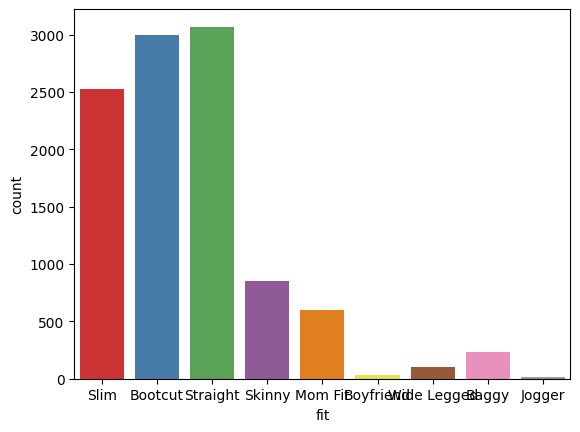

In [8]:
# add figsize to make it bigger
sns.countplot(x='fit', data=jeans, palette='Set1')

In [9]:
# Group by gender to get count
jeans['gender'].value_counts()

gender
W    8619
M    2312
Name: count, dtype: int64

Data is skewed for Female Jeans

<Axes: xlabel='gender', ylabel='count'>

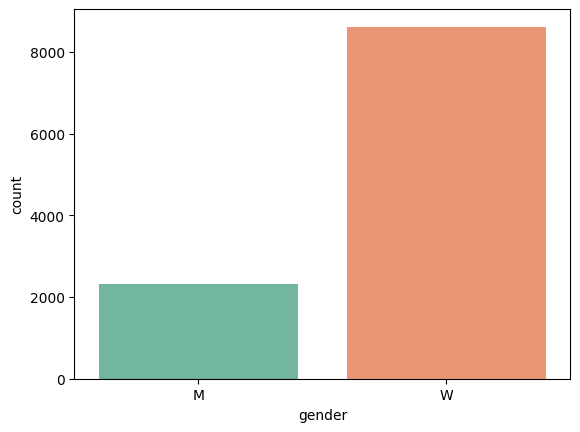

In [10]:
sns.countplot(x='gender', data=jeans, palette='Set2')

In [11]:
# Lets do a K-Means clusstering on the data where the fit is the target
required_columns = jeans[['waist','gender','hip','bottom_opening','thigh','rise_value','fit']]
required_columns.dropna(inplace=True)

/var/folders/1n/jx1cq0bx301bmmtgw78690fm0000gn/T/ipykernel_22088/3486146208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  required_columns.dropna(inplace=True)


In [12]:
required_columns.shape

(10412, 7)

In [13]:
required_womens_jeans = required_columns[required_columns['gender']=='W']
# add size restriction for waist below 26 and above 34
required_womens_jeans = required_womens_jeans[(required_womens_jeans['waist']>=26) & (required_womens_jeans['waist']<=34)]

required_womens_jeans.shape

X = required_womens_jeans.drop(['fit','gender'], axis=1)
y = required_womens_jeans['fit']

In [14]:
print(X.shape,y.shape)

(8088, 5) (8088,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [16]:
# apply scaling to the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## KNeighbors Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(f'Accuracy of K-NN classifier on training set: {knn.score(X_train, y_train):.2f}')
print(f'Accuracy of K-NN classifier on test set: {knn.score(X_test, y_test):.2f}')

Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.71


## Support Vector Classifier

In [18]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print(f'Accuracy of SVM classifier on training set: {svm.score(X_train, y_train):.2f}')
print(f'Accuracy of SVM classifier on test set: {svm.score(X_test, y_test):.2f}')

Accuracy of SVM classifier on training set: 0.75
Accuracy of SVM classifier on test set: 0.75


## Gaussian Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(f'Accuracy of GNB classifier on training set: {gnb.score(X_train, y_train):.2f}')
print(f'Accuracy of GNB classifier on test set: {gnb.score(X_test, y_test):.2f}')

Accuracy of GNB classifier on training set: 0.65
Accuracy of GNB classifier on test set: 0.67


## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)
print(f'Accuracy of Logistic regression classifier on training set: {logreg.score(X_train, y_train):.2f}')
print(f'Accuracy of Logistic regression classifier on test set: {logreg.score(X_test, y_test):.2f}')

Accuracy of Logistic regression classifier on training set: 0.71
Accuracy of Logistic regression classifier on test set: 0.72


## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
print(f'Accuracy of Decision Tree classifier on training set: {clf.score(X_train, y_train):.2f}')
print(f'Accuracy of Decision Tree classifier on test set: {clf.score(X_test, y_test):.2f}')

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.65


## Linear Discriminant Analysis

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print(f'Accuracy of LDA classifier on training set: {lda.score(X_train, y_train):.2f}')
print(f'Accuracy of LDA classifier on test set: {lda.score(X_test, y_test):.2f}')

Accuracy of LDA classifier on training set: 0.74
Accuracy of LDA classifier on test set: 0.75
